In [1]:
# -*- coding: utf-8 -*-
## Exemplo de Criação de um modelo de Previsão/Classificação usando as Arvores de Decisão
## Example of Creating a Forecast/Classification model using Decision Trees

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from subprocess import call

plt.rcParams['figure.facecolor'] = 'white'

df = pd.read_csv('../Fraud/dataset/registration_data_20K_full.csv',sep=',',header=0)
i = 0
for d in df['ip_address']:
    d = (d.split(".",1))
    #print(d[0])
    df.loc[i, 'ip_address'] = d[0]
    i = i+1
j=0
for d in df['email_address']:
    d = (d.split("@",1))
    #print(d[1])
    if(d[1] == "example.net"):
        df.loc[j, 'email_address'] = 0
    elif(d[1] == "example.org"):
        df.loc[j, 'email_address'] = 1
    elif(d[1] == "example.com"):
        df.loc[j, 'email_address'] = 2
    j = j + 1
z=0
for d in df['billing_address']:
    d = (d.split(" ",1))
    #print(d[0])
    df.loc[z, 'billing_address'] = d[0]
    z = z + 1
df = df.drop('billing_state', axis=1)
df = df.drop('user_agent', axis=1)
df = df.drop('phone_number', axis=1)
df = df.drop('EVENT_TIMESTAMP', axis=1)
df["EVENT_LABEL"]= df["EVENT_LABEL"].map({"legit": 1,"fraud": 0})
raw_data = df.copy()
df.head(10)     #Mostra as primeiras n linhas do conjunto de dados
#df.tail(5)     #Mostra as últimas n linhas do conjunto de dados

,ip_address,email_address,billing_postal,billing_address,EVENT_LABEL
0,112,0,34491,12351,1
1,192,0,34555,691,1
2,185,0,33611,28583,1
3,68,0,33520,019,1
4,117,2,33889,1023,1
5,94,1,34362,520,1
6,33,2,34421,30898,1
7,204,0,33605,8307,1
8,49,2,33918,284,1
9,42,2,34603,0793,1


In [2]:
np.set_printoptions(suppress=True)

# Defining some regular bins
# Bin for variation coefiecient
bins_var = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]

# Bin for values between 0 and 1
bins_from_zero = [0, 0.2, 0.4, 0.6, 0.8, 1]


,Valor
count,20000.000000
mean,0.949550
std,0.218877
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000
mode,1.000000


,Nº de Ips
0,1009
1,18991


,Nº de Ips


<AxesSubplot:ylabel='EVENT_LABEL'>

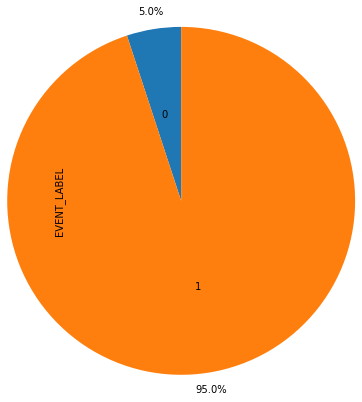

In [3]:
curColumn = raw_data['EVENT_LABEL']

fPorDistrito = curColumn[raw_data['ip_address'] == 1]
empresasFalidasPorDistrito = pd.DataFrame(fPorDistrito.value_counts().sort_index())
empresasFalidasPorDistrito.columns = ['Nº de Ips']

colSummary = curColumn.describe()
colSummary.loc['mode'] = curColumn.mode().tolist()[0]
dfSummary = pd.DataFrame(colSummary)
dfSummary.columns = ['Valor']
display(dfSummary)

totalPerAtrr = pd.DataFrame(curColumn.value_counts().sort_index())
totalPerAtrr.columns = ['Nº de Ips']
display(totalPerAtrr)
display(empresasFalidasPorDistrito)

curColumn.value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    radius=2,
    pctdistance=1.1,
    labeldistance=0.5
)

,Valor
count,20000
unique,3
top,0
freq,6978
mode,0


,Número de emails por tipo
"(0, 1]",6363
"(1, 2]",6659


<AxesSubplot:>

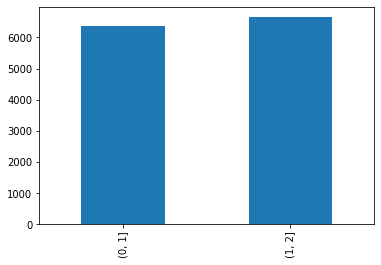

In [4]:
curColumn = raw_data['email_address']
var_empregados = curColumn.unique()
var_empregados.sort()

colSummary = curColumn.describe()
colSummary.loc['mode'] = curColumn.mode().tolist()[0]
dfSummary = pd.DataFrame(colSummary)
dfSummary.columns = ['Valor']

bins = [0,1,2]
curColumn = pd.cut(curColumn, bins)

dfIntervals = pd.DataFrame(curColumn.value_counts().sort_index())
dfIntervals.columns = ['Número de emails por tipo']

display(dfSummary)
display(dfIntervals)
curColumn.value_counts().sort_index().plot.bar()



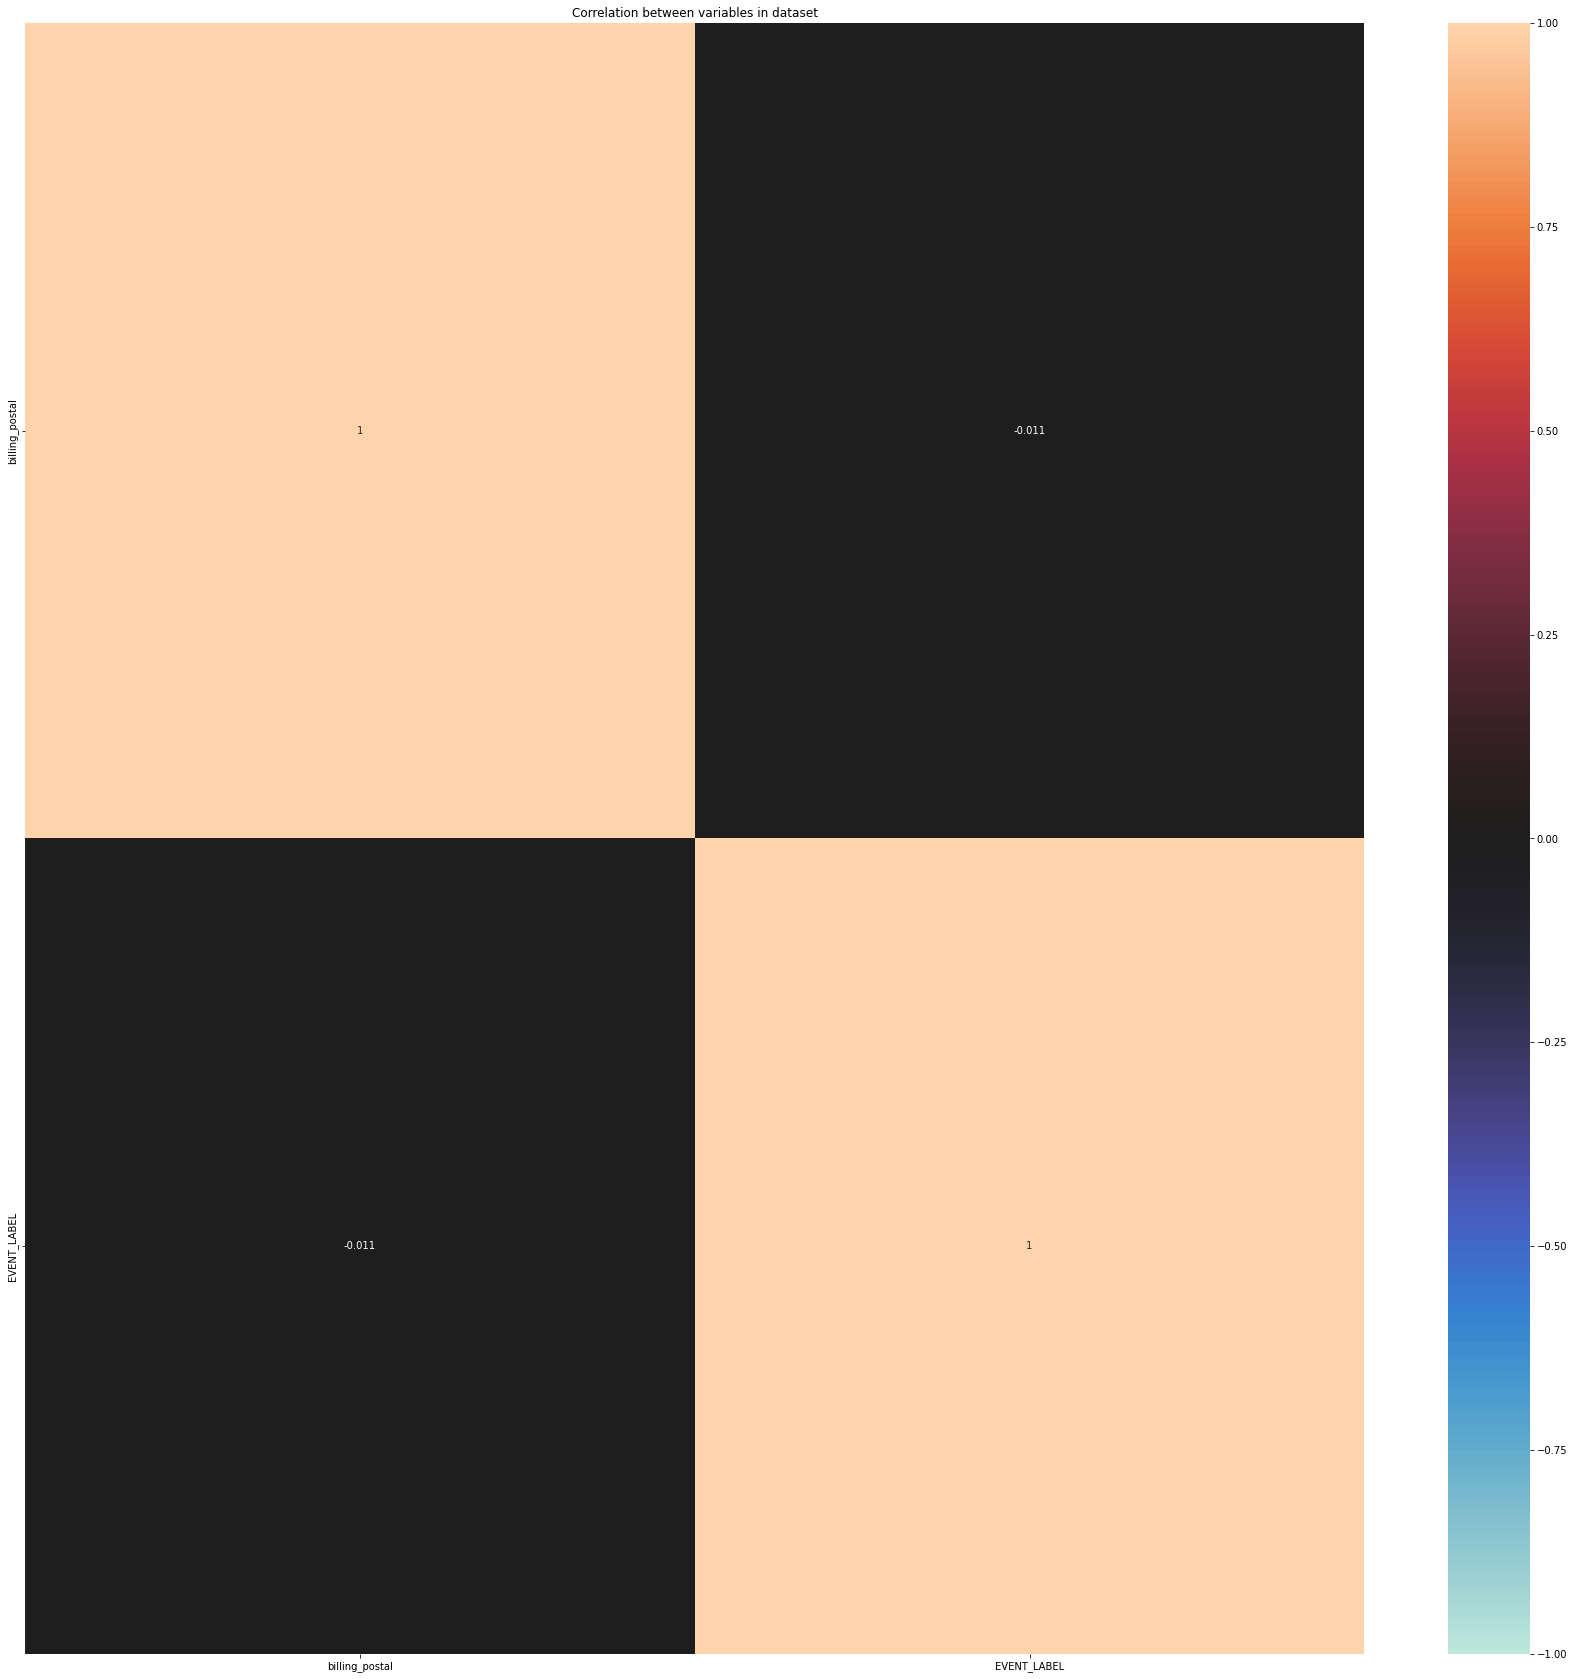

In [7]:
# Configuring the matplotlib figure size and title
fig, ax = plt.subplots(figsize=(30,30))
ax.set_title('Correlation between variables in dataset')

# Excluding the categorical columns from dataframe
filtered_data = raw_data.copy()
heatmap = sns.heatmap(filtered_data.corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap="icefire")

# Saving the image to a file
#plt.savefig('correlation_matrix.png', bbox_inches="tight")

In [8]:
raw_data.head()

,ip_address,email_address,billing_postal,billing_address,EVENT_LABEL
0,112,0,34491,12351,1
1,192,0,34555,691,1
2,185,0,33611,28583,1
3,68,0,33520,019,1
4,117,2,33889,1023,1


<AxesSubplot:>

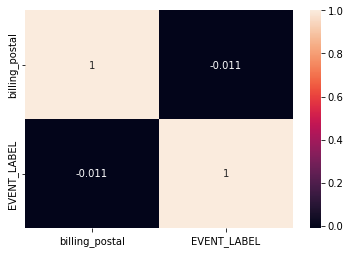

In [9]:
import seaborn as sn
m=raw_data.corr()
sn.heatmap(m, annot=True)

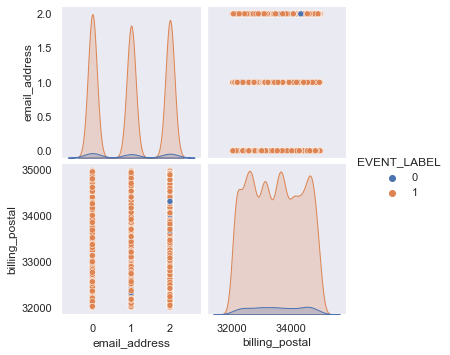

In [11]:
sn.set_theme(style="dark")
g=sn.pairplot(raw_data, hue="EVENT_LABEL")
g.savefig("scatterplot_matrix.png")